Visualizing velocity field for step 50...


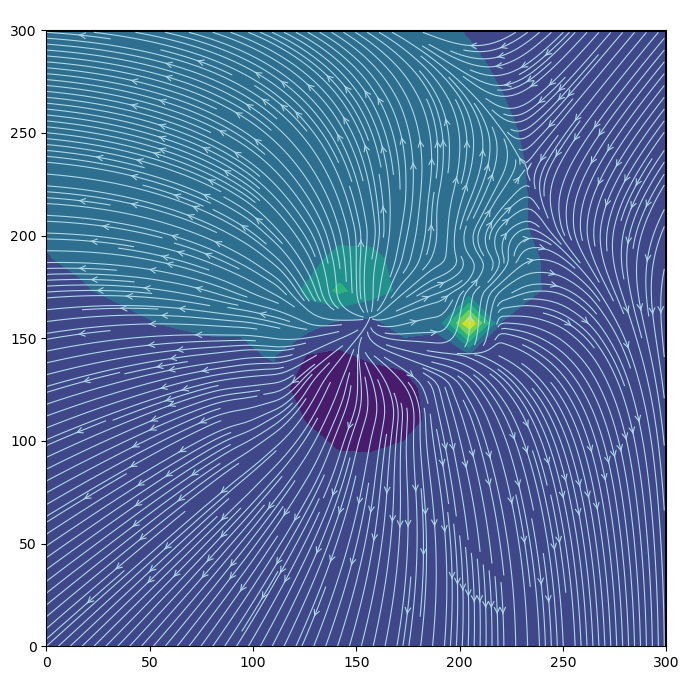

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

def visualize_velocity_field(step_number):
    """
    Loads and visualizes the fluid velocity field for a specific time step.
    """
    # 1. Define the file path
    output_dir = "simulation_data_main"
    filename = os.path.join(output_dir, f"velocity_field_step_{step_number}.npz")

    if not os.path.exists(filename):
        print(f"Error: File not found at {filename}")
        return

    # 2. Load the .npz file and access the array
    with np.load(filename) as data:
        fluid_velocity = data['fluid_velocity']

    domain_size = fluid_velocity.shape[:2] # Get domain size from the array shape

    # 3. Plot with streamplot (same as in the simulation)
    print(f"Visualizing velocity field for step {step_number}...")
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_facecolor('black')
    ax.set_title(f"Fluid Velocity Field at Step {step_number}", color='white')

    # Create the coordinate grid for the plot
    num_points = 20 # Adjust density of streamlines
    y_coords = np.linspace(0, domain_size[0] - 1, num_points)
    x_coords = np.linspace(0, domain_size[1] - 1, num_points)
    x, y = np.meshgrid(x_coords, y_coords)

    # Get the velocity components at the grid points
    vx = fluid_velocity[y.astype(int), x.astype(int), 0]
    vy = fluid_velocity[y.astype(int), x.astype(int), 1]

    # Draw the streamlines
    ax.streamplot(x, y, vx, vy,
                  color='lightblue',
                  linewidth=0.8,
                  density=3.5,
                  arrowstyle='->',
                  arrowsize=1.0)

    ax.contourf(x, y, vy)
    
    ax.set_xlim(0, domain_size[1])
    ax.set_ylim(0, domain_size[0])
    plt.show()



# Specify which time step you want to visualize
# This must be a step you saved (e.g., 0, 50, 100, etc.)
step_to_visualize = 50 
visualize_velocity_field(step_to_visualize)